In [6]:
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt

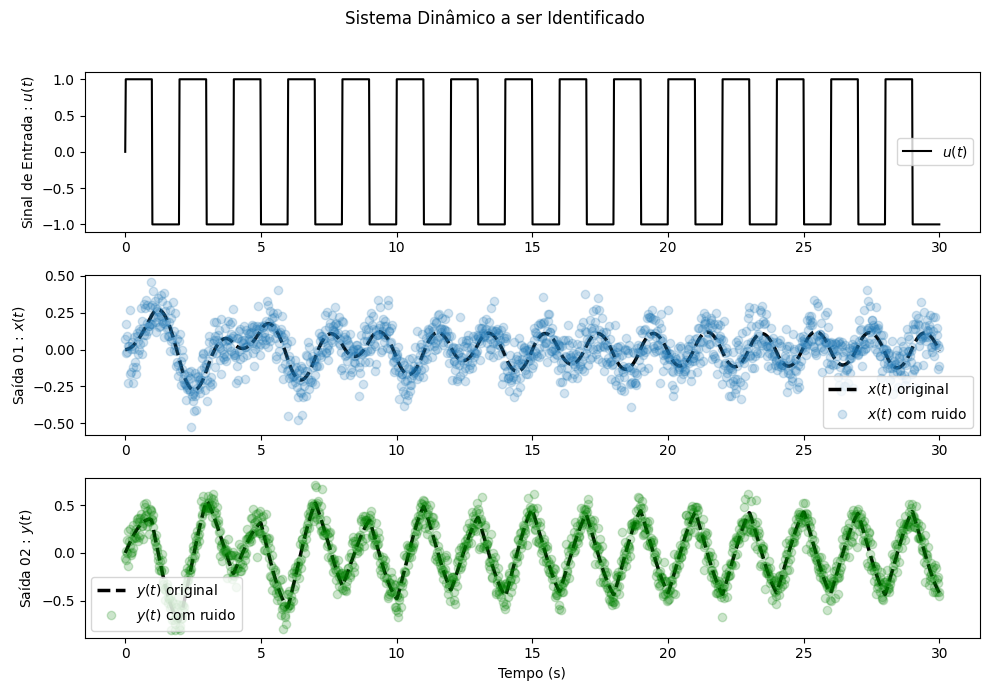

In [7]:
data = np.loadtxt('dados.txt', delimiter=',', skiprows=1)

t = data[:, 0]
u = data[:, 1]
x = data[:, 2]
y = data[:, 3]
x1 = data[:, 4]
y1 = data[:, 5]

# Plot results of simulation
plt.figure(figsize=(10, 7))
plt.subplot(3, 1, 1)
plt.plot(t, u, label='$u(t)$', color='k')
plt.ylabel('Sinal de Entrada : $u(t)$')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, x1, '--k', lw = 2.5, label='$x(t)$ original')
plt.plot(t, x, 'o', alpha = 0.2, label='$x(t)$ com ruido')
plt.ylabel('Saída 01 : $x(t)$')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, y1, '--k', lw = 2.5, label='$y(t)$ original')
plt.plot(t, y, 'og', alpha=0.2, label='$y(t)$ com ruido')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída 02 : $y(t)$')
plt.legend()

plt.suptitle('Sistema Dinâmico a ser Identificado')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

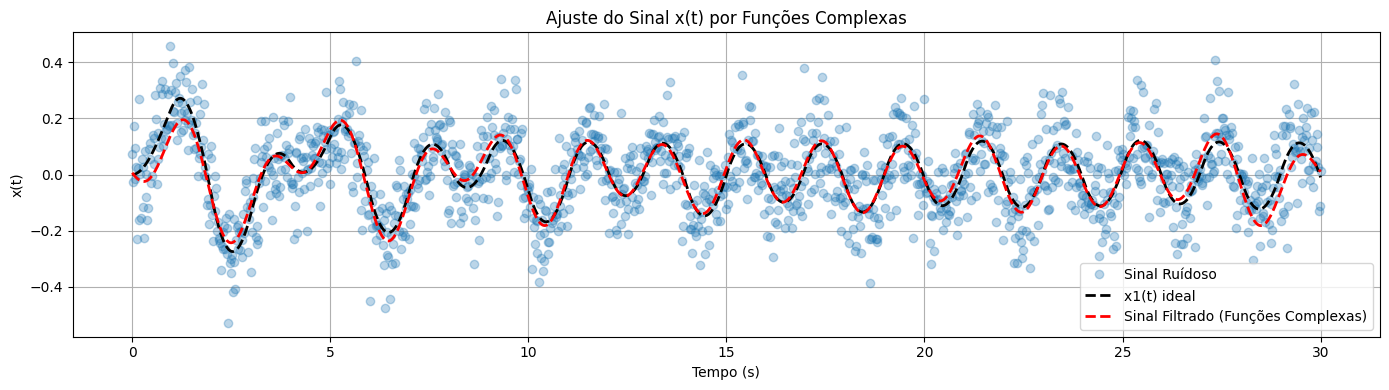

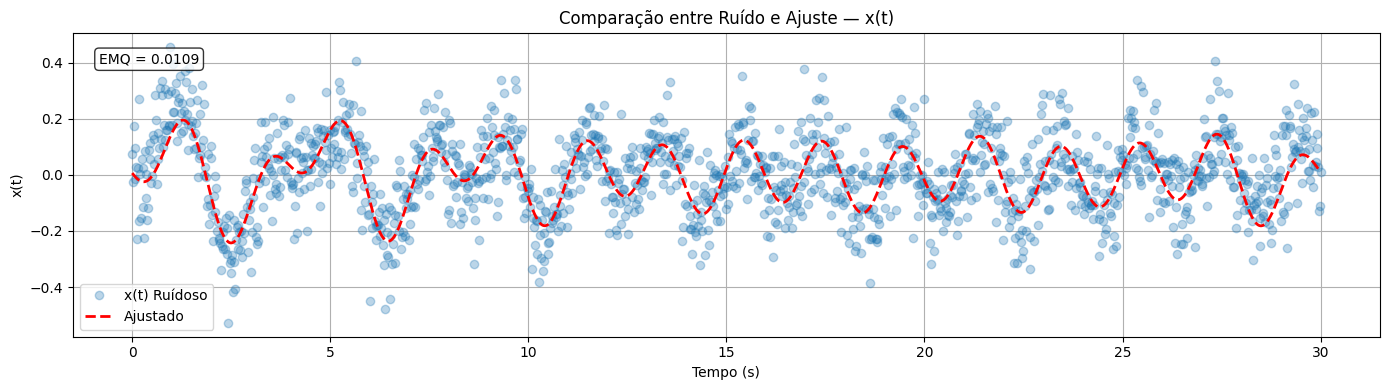

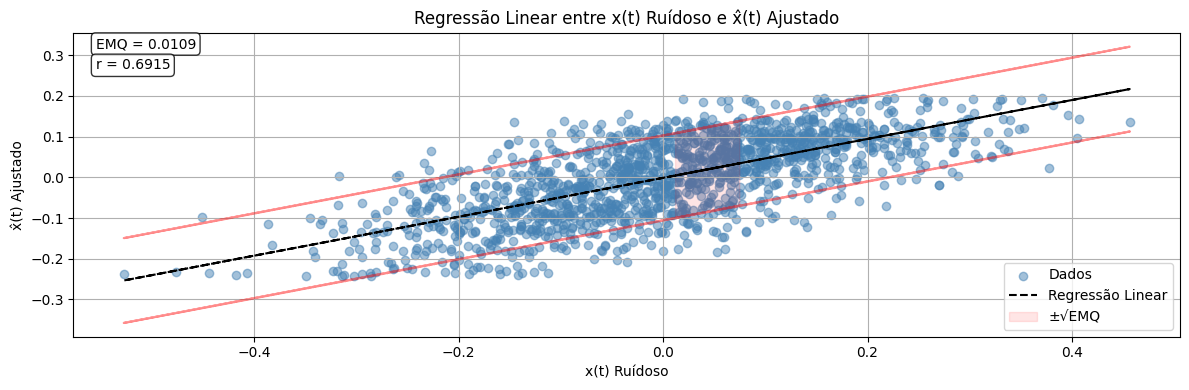

In [ ]:
#AJUSTE DOS DADOS DE X

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr

data = np.loadtxt("dados.txt", delimiter=",", skiprows=1)


t  = data[:, 0]   # tempo
u =  data[:, 1]   # entrada
x  = data[:, 2]   # sinal ruidoso
x1 = data[:, 4]   # sinal ideal


N = len(x)
g = np.exp(-2j * np.pi / N) #e^-2jpinm/N

# Matriz DFT
W = np.array([[g**(m*n) for n in range(N)] for m in range(N)]) / np.sqrt(N)

# DFT do sinal
X = W @ x

# filtro
mod = np.abs(X)
limiar = 0.15 * np.max(mod) #limiar de 15%
H = np.where(mod >= limiar, 1, 0)

# aplicando o filtro
Y = H * X

# inversa do DFT
x_ajuste = (W.conj().T @ Y).real

#Plot x ajustado, x ideal, x ruidoso
plt.figure(figsize=(14,4))
plt.plot(t, x, 'o', alpha=0.3, label='Sinal Ruídoso')
plt.plot(t, x1, 'k--', linewidth=2, label='x1(t) ideal')
plt.plot(t, x_ajuste, 'r--', linewidth=2, label='Sinal Filtrado (Funções Complexas)')
plt.title("Ajuste do Sinal x(t) por Funções Complexas")
plt.xlabel("Tempo (s)")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#calculo do EMQ
EMQ_x = np.mean((x - x_ajuste)**2)

#Plot x ruidoso e x ajustado. com EMQ
plt.figure(figsize=(14,4))
plt.plot(t, x, 'o', alpha=0.3, label='x(t) Ruídoso')
plt.plot(t, x_ajuste, 'r--', linewidth=2, label='Ajustado')
plt.text(0.02, 0.9, f"EMQ = {EMQ_x:.4f}",
         transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.title("Comparação entre Ruído e Ajuste — x(t)")
plt.xlabel("Tempo (s)")
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# calcula da Regressão linear
a_x, b_x, _, _, _ = linregress(x, x_ajuste)
y_reg = a_x * x + b_x

# calculo da Correlação de Pearson
r_x, _ = pearsonr(x, x_ajuste)

# Faixa do RMSE
erro = np.sqrt(EMQ_x)
y_sup = y_reg + erro
y_inf = y_reg - erro

#Plot Regressão linear e Pearson(r)
plt.figure(figsize=(12,4))
plt.scatter(x, x_ajuste, alpha=0.5, color='steelblue', label="Dados")
plt.plot(x, y_reg, 'k--', label="Regressão Linear")
plt.plot(x, y_sup, 'r', alpha=0.4)
plt.plot(x, y_inf, 'r', alpha=0.4)
plt.fill_between(x, y_inf, y_sup, color='red', alpha=0.1, label="±√EMQ")

# Caixas com as métricas
plt.text(0.02, 0.95, f"EMQ = {EMQ_x:.4f}",
         transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.text(0.02, 0.88, f"r = {r_x:.4f}",
         transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title("Regressão Linear entre x(t) Ruídoso e x̂(t) Ajustado")
plt.xlabel("x(t) Ruídoso")
plt.ylabel("x̂(t) Ajustado")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

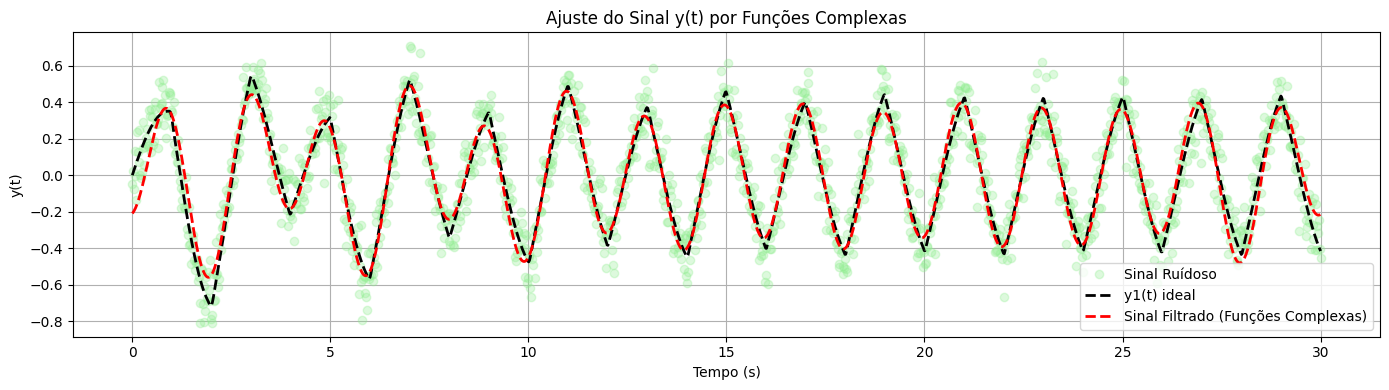

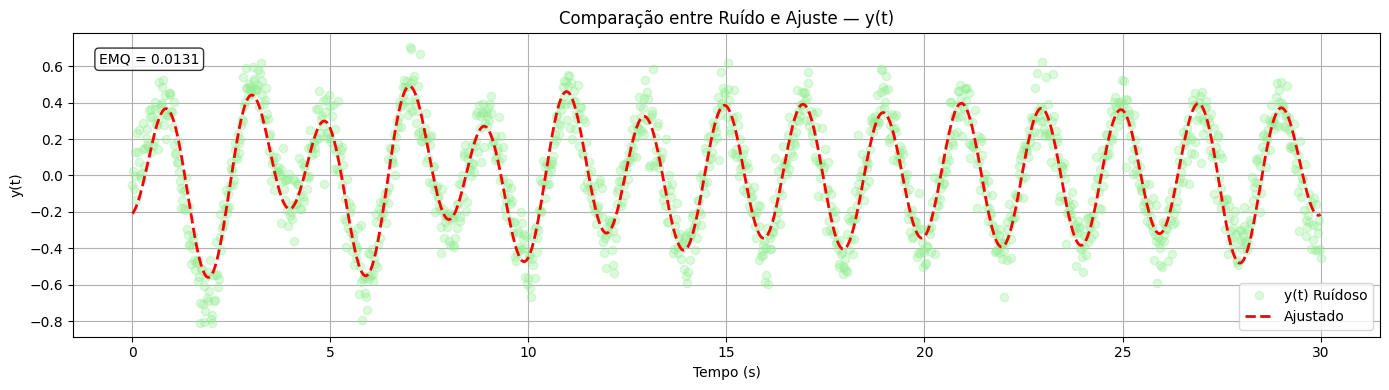

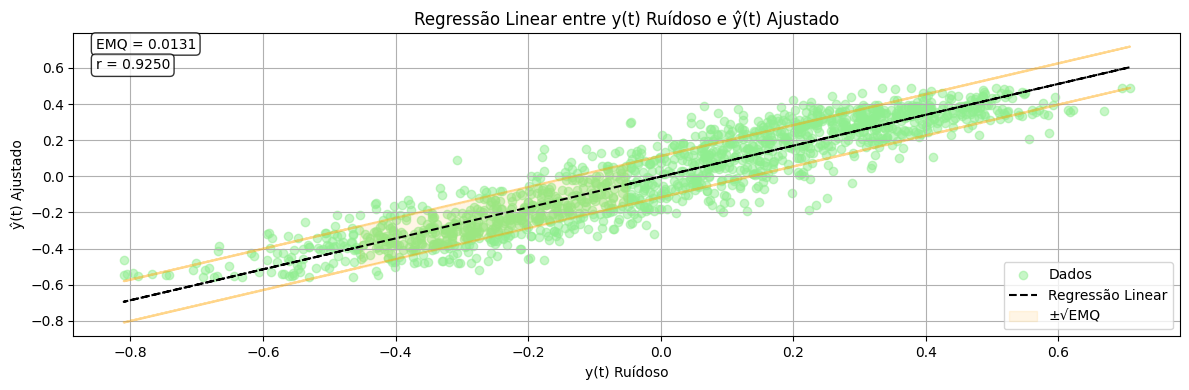

In [ ]:
# AJUSTE DOS DADOS DE Y

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr

data = np.loadtxt("dados.txt", delimiter=",", skiprows=1)

t  = data[:, 0]   # tempo
u  = data[:, 1]   # entrada
y  = data[:, 3]   # sinal ruidoso de y(t)
y1 = data[:, 5]   # sinal ideal de y(t)

N = len(y)
g = np.exp(-2j * np.pi / N)  # e^-j2pimn/N

# Matriz DFT
W = np.array([[g**(m*n) for n in range(N)] for m in range(N)]) / np.sqrt(N)

# DFT do sinal
Y_freq = W @ y

# filtro
mod = np.abs(Y_freq)
limiar = 0.1 * np.max(mod) #limiar de 10%
H = np.where(mod >= limiar, 1, 0)

# aplicando o filtro
Y_filt = H * Y_freq

# inversa da DFT
y_ajuste = (W.conj().T @ Y_filt).real

# Plot y ajustado, y ideal, y ruidoso
plt.figure(figsize=(14,4))
plt.plot(t, y, 'o',color="lightgreen", alpha=0.3, label='Sinal Ruídoso')
plt.plot(t, y1, 'k--', linewidth=2, label='y1(t) ideal')
plt.plot(t, y_ajuste, 'r--', linewidth=2, label='Sinal Filtrado (Funções Complexas)')
plt.title("Ajuste do Sinal y(t) por Funções Complexas")
plt.xlabel("Tempo (s)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# cálculo do EMQ
EMQ_y = np.mean((y - y_ajuste)**2)

# Plot y ruidoso e y ajustado com EMQ
plt.figure(figsize=(14,4))
plt.plot(t, y, 'o', color="lightgreen", alpha=0.3, label='y(t) Ruídoso')
plt.plot(t, y_ajuste, 'r--', linewidth=2, label='Ajustado')
plt.text(0.02, 0.9, f"EMQ = {EMQ_y:.4f}",
         transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.title("Comparação entre Ruído e Ajuste — y(t)")
plt.xlabel("Tempo (s)")
plt.ylabel("y(t)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# cálculo da Regressão linear
a_y, b_y, _, _, _ = linregress(y, y_ajuste)
y_reg = a_y * y + b_y

# cálculo do Coeficiente de Pearson
r_y, _ = pearsonr(y, y_ajuste)

# faixa ±√EMQ
erro = np.sqrt(EMQ_y)
y_sup = y_reg + erro
y_inf = y_reg - erro

# Plot Regressão linear e Pearson(r)
plt.figure(figsize=(12,4))
plt.scatter(y, y_ajuste, alpha=0.5, color='lightgreen', label="Dados")
plt.plot(y, y_reg, 'k--', label="Regressão Linear")
plt.plot(y, y_sup, 'orange', alpha=0.4)
plt.plot(y, y_inf, 'orange', alpha=0.4)
plt.fill_between(y, y_inf, y_sup, color='orange', alpha=0.1, label="±√EMQ")

# Caixas com as métricas
plt.text(0.02, 0.95, f"EMQ = {EMQ_y:.4f}",
         transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.text(0.02, 0.88, f"r = {r_y:.4f}",
         transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title("Regressão Linear entre y(t) Ruídoso e ŷ(t) Ajustado")
plt.xlabel("y(t) Ruídoso")
plt.ylabel("ŷ(t) Ajustado")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


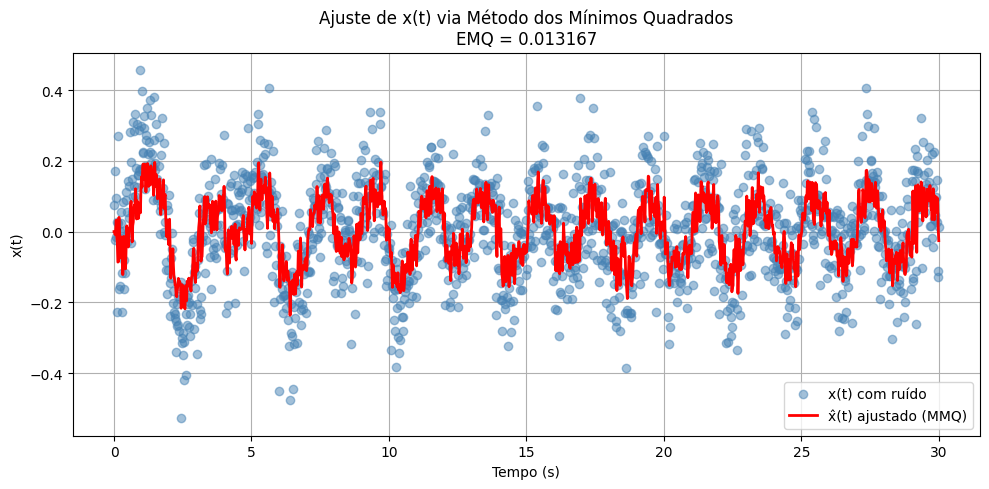

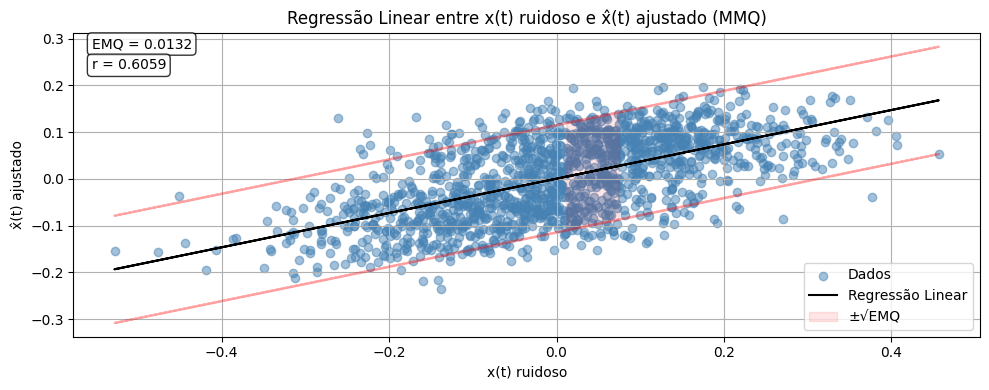

In [ ]:
# AJUSTE POR MMQ DE X

N = len(x)
A = np.zeros((N-2, 4))  # matriz de regressão
Y = np.zeros((N-2, 1))  # vetor de saídas conhecidas

for n in range(2, N):
    A[n-2, :] = [x[n-1], x[n-2], u[n-1], u[n-2]]
    Y[n-2] = x[n]

# Resolvendo por MMQ
theta, *_ = np.linalg.lstsq(A, Y, rcond=None)
a1, a2, b1, b2 = theta.flatten()

# Calculando x ajustado
x_hat = np.zeros_like(x)
for n in range(2, N):
    x_hat[n] = a1*x[n-1] + a2*x[n-2] + b1*u[n-1] + b2*u[n-2]

#Calculo EMQ
EMQ_x = np.mean((x - x_hat)**2)

# Plot gráfico do ajuste
plt.figure(figsize=(10,5))
plt.plot(t, x, 'o', color='steelblue', alpha=0.5, label="x(t) com ruído")
plt.plot(t, x_hat, 'r', lw=2, label="x̂(t) ajustado (MMQ)")
plt.title(f"Ajuste de x(t) via Método dos Mínimos Quadrados\nEMQ = {EMQ_x:.6f}")
plt.xlabel("Tempo (s)")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

from scipy.stats import linregress, pearsonr

#Regressão linear entre x ruidodo e x ajustado
a_x, b_x, _, _, _ = linregress(x, x_hat)
r_x, _ = pearsonr(x, x_hat)

#Reta de regressão e faixa de erro
y_reg = a_x * x + b_x
erro = np.sqrt(EMQ_x)
y_sup = y_reg + erro
y_inf = y_reg - erro

#Plot Grafico Regressão Linear e Pearson
plt.figure(figsize=(10,4))
plt.scatter(x, x_hat, alpha=0.5, color='steelblue', label='Dados')
plt.plot(x, y_reg, 'k', label='Regressão Linear')
plt.plot(x, y_sup, 'r', alpha=0.3)
plt.plot(x, y_inf, 'r', alpha=0.3)

plt.fill_between(x, y_inf, y_sup, color='red', alpha=0.1, label='±√EMQ')
plt.text(0.02, 0.95, f'EMQ = {EMQ_x:.4f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.text(0.02, 0.88, f'r = {r_x:.4f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title("Regressão Linear entre x(t) ruidoso e x̂(t) ajustado (MMQ)")
plt.xlabel("x(t) ruidoso")
plt.ylabel("x̂(t) ajustado")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

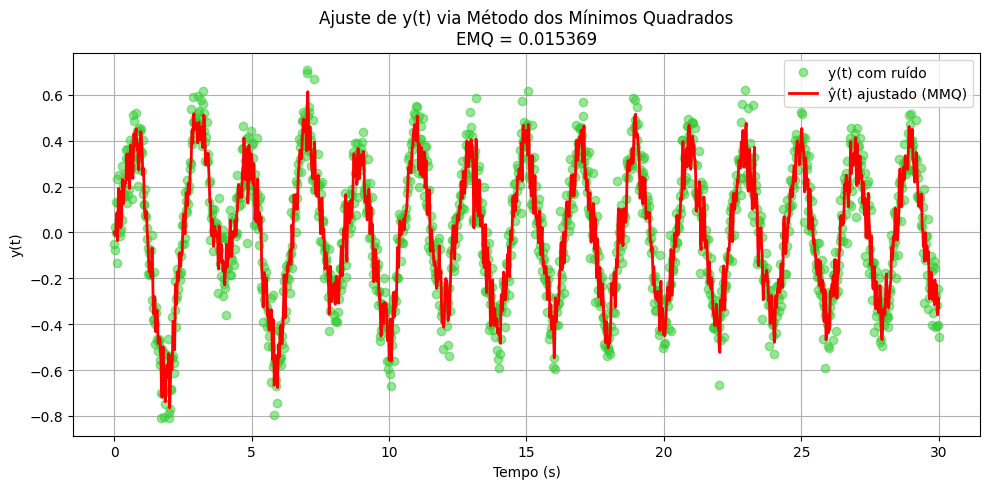

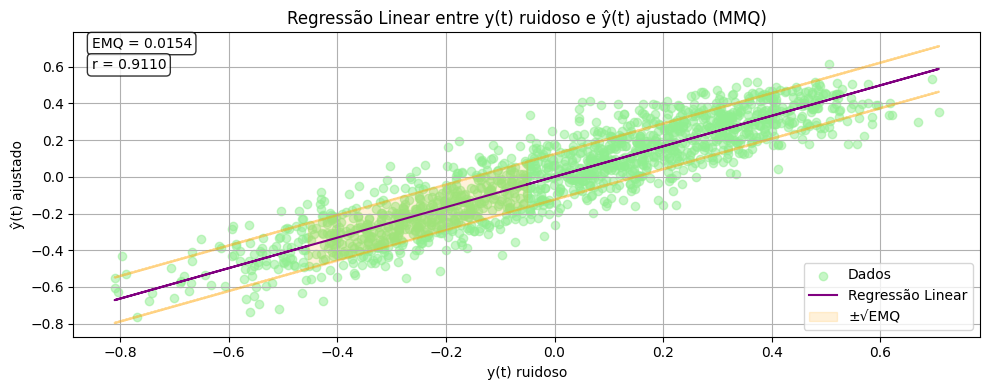

In [ ]:
#AJUSTE POR MMQ DE Y

N = len(y)
A = np.zeros((N-2, 4))  # matriz de regressão
Y = np.zeros((N-2, 1))  # vetor de saídas conhecidas

for n in range(2, N):
    A[n-2, :] = [y[n-1], y[n-2], u[n-1], u[n-2]]
    Y[n-2] = y[n]

#Resolvendo por MMQ
theta, *_ = np.linalg.lstsq(A, Y, rcond=None)
a1, a2, b1, b2 = theta.flatten()

# calculando y ajustado
y_hat = np.zeros_like(y)
for n in range(2, N):
    y_hat[n] = a1*y[n-1] + a2*y[n-2] + b1*u[n-1] + b2*u[n-2]

# Calculo do EMQ
EMQ_y = np.mean((y - y_hat)**2)

# Plot gráfico do ajuste
plt.figure(figsize=(10,5))
plt.plot(t, y, 'o', color='limegreen', alpha=0.5, label="y(t) com ruído")
plt.plot(t, y_hat, 'r', lw=2, label="ŷ(t) ajustado (MMQ)")
plt.title(f"Ajuste de y(t) via Método dos Mínimos Quadrados\nEMQ = {EMQ_y:.6f}")
plt.xlabel("Tempo (s)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

from scipy.stats import linregress, pearsonr

#Regressão linear entre y ruidoso e y ajustado
a_y, b_y, _, _, _ = linregress(y, y_hat)
r_y, _ = pearsonr(y, y_hat)

#Reta de regressão e faixa de erro
y_reg = a_y * y + b_y
erro = np.sqrt(EMQ_y)
y_sup = y_reg + erro
y_inf = y_reg - erro

# Plot Regressão e Pearson
plt.figure(figsize=(10,4))
plt.scatter(y, y_hat, alpha=0.5, color='lightgreen', label='Dados')
plt.plot(y, y_reg, 'purple', label='Regressão Linear')
plt.plot(y, y_sup, color='orange', alpha=0.4)
plt.plot(y, y_inf, color='orange', alpha=0.4)
plt.fill_between(y, y_inf, y_sup, color='orange', alpha=0.15, label='±√EMQ')

plt.text(0.02, 0.95, f'EMQ = {EMQ_y:.4f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.text(0.02, 0.88, f'r = {r_y:.4f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title("Regressão Linear entre y(t) ruidoso e ŷ(t) ajustado (MMQ)")
plt.xlabel("y(t) ruidoso")
plt.ylabel("ŷ(t) ajustado")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# CONCLUSÃO

'''
Com os resultados atualizados, verificamos que o método de ajuste baseado em funções
complexas apresentou desempenho superior ao método dos Mínimos Quadrados (MMQ) tanto
para o sinal x(t) quanto para o sinal y(t), após a escolha adequada dos limiares de
filtragem no domínio da frequência. Para o sinal x(t), o ajuste por funções complexas
resultou em um EMQ menor 0(0.0109 x 0.0132) e em uma correlação de Pearson maior 
(0.6915 x 0.6059). Para o sinal y(t), correu a mesma coisa, a abordagem com funções 
complexas alcançou EMQ menor (0.0131 x 0.0154) e coeficiente de Pearson maior
(0.9250 x 0.9110), superando novamente o MMQ. Assim, concluímos que, para este conjunto
de dados, o método de funções complexas obteve melhor desempenho do que o MMQ, tanto em 
termos de erro (EMQ menor) quanto de correlação (coeficiente de Pearson maior), 
tornando-se a alternativa mais eficiente para a o ajuste de um conjunto de dados
'''
